# Problem 1

In [13]:
# mlp_backprop.py
import torch
from torch import nn

def sigma(x):
    return torch.sigmoid(x)
def sigma_prime(x):
    return sigma(x)*(1-sigma(x))


torch.manual_seed(0)
L = 6
X_data = torch.rand(4, 1)
Y_data = torch.rand(1, 1)

A_list,b_list = [],[]
for _ in range(L-1):
    A_list.append(torch.rand(4, 4))
    b_list.append(torch.rand(4, 1))
A_list.append(torch.rand(1, 4))
b_list.append(torch.rand(1, 1))

# Option 1: directly use PyTorch's autograd feature
for A in A_list:
    A.requires_grad = True
for b in b_list:
    b.requires_grad = True
    
y = X_data
for ell in range(L):
    S = sigma if ell<L-1 else lambda x: x
    y = S(A_list[ell]@y+b_list[ell])
    
# backward pass in pytorch
loss=torch.square(y-Y_data)/2
loss.backward()

print(A_list[0].grad)



tensor([[2.3943e-05, 3.7064e-05, 4.2687e-06, 6.3700e-06],
        [3.4104e-05, 5.2794e-05, 6.0804e-06, 9.0735e-06],
        [2.4438e-05, 3.7831e-05, 4.3571e-06, 6.5019e-06],
        [2.0187e-05, 3.1250e-05, 3.5991e-06, 5.3707e-06]])


In [14]:
# mlp_backprop.py
import torch
from torch import nn

def sigma(x):
    return torch.sigmoid(x)
def sigma_prime(x):
    return sigma(x)*(1-sigma(x))


torch.manual_seed(0)
L = 6
X_data = torch.rand(4, 1)
Y_data = torch.rand(1, 1)

A_list,b_list = [],[]
for _ in range(L-1):
    A_list.append(torch.rand(4, 4))
    b_list.append(torch.rand(4, 1))
A_list.append(torch.rand(1, 4))
b_list.append(torch.rand(1, 1))
# Option 2: construct a NN model and use backprop
class MLP(nn.Module) :
    def __init__(self) :
        super().__init__()
        self.linear = nn.ModuleList([nn.Linear(4,4) for _ in range(L-1)])
        self.linear.append(nn.Linear(4,1))
        for ell in range(L):
            self.linear[ell].weight.data = A_list[ell]
            self.linear[ell].bias.data = b_list[ell].squeeze()
        
    def forward(self, x) :
        x = x.squeeze()
        for ell in range(L-1):
            x = sigma(self.linear[ell](x))
        x = self.linear[-1](x)
        return x

model = MLP()
            
loss = torch.square(model(X_data)-Y_data)/2
loss.backward()

print(model.linear[0].weight.grad)


tensor([[2.3943e-05, 3.7064e-05, 4.2687e-06, 6.3700e-06],
        [3.4104e-05, 5.2794e-05, 6.0804e-06, 9.0735e-06],
        [2.4438e-05, 3.7831e-05, 4.3571e-06, 6.5019e-06],
        [2.0187e-05, 3.1250e-05, 3.5991e-06, 5.3707e-06]])


In [32]:
# mlp_backprop.py
import torch
from torch import nn

def sigma(x):
    return torch.sigmoid(x)
def sigma_prime(x):
    return sigma(x)*(1-sigma(x))


torch.manual_seed(0)
L = 6
X_data = torch.rand(4, 1)
Y_data = torch.rand(1, 1)

A_list,b_list = [],[]
for _ in range(L-1):
    A_list.append(torch.rand(4, 4))
    b_list.append(torch.rand(4, 1))
A_list.append(torch.rand(1, 4))
b_list.append(torch.rand(1, 1))

# Option 3: implement backprop yourself
y_list = [X_data]
y = X_data
for ell in range(L):
    S = sigma if ell<L-1 else lambda x: x
    y = S(A_list[ell]@y+b_list[ell])
    y_list.append(y)


dA_list = []
db_list = []
dy = y-Y_data  # dloss/dy_L
for ell in reversed(range(L)):
    S = sigma_prime if ell<L-1 else lambda x: torch.ones(x.shape)
    A, b, y = A_list[ell], b_list[ell], y_list[ell]

    db = S(A@y+b).T[0].diag()@dy.T    # dloss/db_ell  
    dA = S(A@y+b).T[0].diag()@dy.T@y.T    # dloss/dA_ell
    dy = dy@S(A@y+b).T[0].diag()@A    # dloss/dy_{ell-1}

    dA_list.insert(0, dA)
    db_list.insert(0, db)

print(dA_list[0])


tensor([[2.3943e-05, 3.7064e-05, 4.2687e-06, 6.3700e-06],
        [3.4104e-05, 5.2794e-05, 6.0804e-06, 9.0735e-06],
        [2.4438e-05, 3.7831e-05, 4.3571e-06, 6.5019e-06],
        [2.0187e-05, 3.1250e-05, 3.5991e-06, 5.3707e-06]])


Same answer with the previous codes.

# Problem 2

![](https://cdn.discordapp.com/attachments/947918193924636695/1226725877707046912/Screenshot_20240408_114919.jpg?ex=6625d080&is=66135b80&hm=015894aa55849db54bc1412a96c67e79e1322fb7b21622fa551deefdd97628b3&)

# Problem 3

![](https://cdn.discordapp.com/attachments/947918193924636695/1226725877992132718/Screenshot_20240408_114932.jpg?ex=6625d080&is=66135b80&hm=4de4dd56a964ddaecf8501acfbc4e776c736acaa9e2e23dfedc147b63160c00f&)

# Problem 4

![](https://cdn.discordapp.com/attachments/947918193924636695/1226725878344450058/Screenshot_20240408_114944.jpg?ex=6625d080&is=66135b80&hm=1e56178f8e462e507cb46d1961e6c904fab58df266b272bf0d810f74bd818101&)

# Problem 5

In [10]:
(256*128+256*9*192+256*25*96)+(128+192+96)

1089952

In [11]:
(256*128+256*64+64*9*192+256*64+64*25*96+256*32)*(32**2)

346030080

In [13]:
(128+64+64+192+96+64)*(32**2)

622592

![](https://cdn.discordapp.com/attachments/947918193924636695/1226725878671609876/Screenshot_20240408_114955.jpg?ex=6625d080&is=66135b80&hm=95a2756a9e6ef244304e0fddb0431baec18235c27a5bf16aff23920ca31ae998&)

![](https://cdn.discordapp.com/attachments/947918193924636695/1226725878986309664/Screenshot_20240408_115005.jpg?ex=6625d081&is=66135b81&hm=90a77e6401950d7bee899579ce01d836b8899a425813515fc064ca26786ad71d&)

# Problem 6

In [65]:
# label_memorization.py
from turtle import color
from numpy import size
import torch
import torch.nn as nn
import time
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

train_dataset = datasets.MNIST(root='./data/',
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)
train_dataset.targets = torch.randint(0, 10, (len(train_dataset),))
train_dataset = torch.utils.data.Subset(train_dataset, range(0, len(train_dataset)//10))

# Make sure to use only 10% of the available MNIST data.
# Otherwise, experiment will take quite long (around 90 minutes).

# (Modified version of AlexNet)
class AlexNet(nn.Module):
    def __init__(self, num_class=10):
        super(AlexNet, self).__init__()

        self.conv_layer1 = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=4),
            nn.ReLU(inplace=True),
            nn.Conv2d(96, 96, kernel_size=3),
            nn.ReLU(inplace=True)
        )
        self.conv_layer2 = nn.Sequential(
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.conv_layer3 = nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        self.fc_layer1 = nn.Sequential(
            nn.Dropout(),
            nn.Linear(6400, 800),
            nn.ReLU(inplace=True),
            nn.Linear(800, 10)
        )

    def forward(self, x):
        output = self.conv_layer1(x)
        output = self.conv_layer2(output)
        output = self.conv_layer3(output)
        output = torch.flatten(output, 1)
        output = self.fc_layer1(output)
        return output


learning_rate = 0.1
batch_size = 64
epochs = 150
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("mps")
model = AlexNet().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


tick = time.time()
loss_list = []
accuracy_list = []

for epoch in range(150):
    print(f"\nEpoch {epoch + 1} / {epochs}")
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        pred = model(images)
        correct += (pred.argmax(1) == labels).type(torch.int).sum().item()
        total += len(labels)
        loss = loss_function(model(images), labels)
        loss.backward()

        optimizer.step()
    loss_list.append(loss.item())
    accuracy_list.append(correct / total)
    print(f"Loss: {loss_list[-1]}, Accuracy: {accuracy_list[-1]}")




tock = time.time()
print(f"Total training time: {tock - tick}")



Epoch 1 / 150
Loss: 2.3025217056274414, Accuracy: 0.10033333333333333

Epoch 2 / 150
Loss: 2.304611921310425, Accuracy: 0.10816666666666666

Epoch 3 / 150
Loss: 2.3057329654693604, Accuracy: 0.1075

Epoch 4 / 150
Loss: 2.3024723529815674, Accuracy: 0.108

Epoch 5 / 150
Loss: 2.3096539974212646, Accuracy: 0.1065

Epoch 6 / 150
Loss: 2.3043670654296875, Accuracy: 0.108

Epoch 7 / 150
Loss: 2.297898530960083, Accuracy: 0.1045

Epoch 8 / 150
Loss: 2.305230140686035, Accuracy: 0.10633333333333334

Epoch 9 / 150
Loss: 2.302746534347534, Accuracy: 0.11033333333333334

Epoch 10 / 150
Loss: 2.3000504970550537, Accuracy: 0.10733333333333334

Epoch 11 / 150
Loss: 2.300485372543335, Accuracy: 0.10716666666666666

Epoch 12 / 150
Loss: 2.2948150634765625, Accuracy: 0.10566666666666667

Epoch 13 / 150
Loss: 2.2897427082061768, Accuracy: 0.108

Epoch 14 / 150
Loss: 2.3066139221191406, Accuracy: 0.10533333333333333

Epoch 15 / 150
Loss: 2.3012502193450928, Accuracy: 0.109

Epoch 16 / 150
Loss: 2.30603

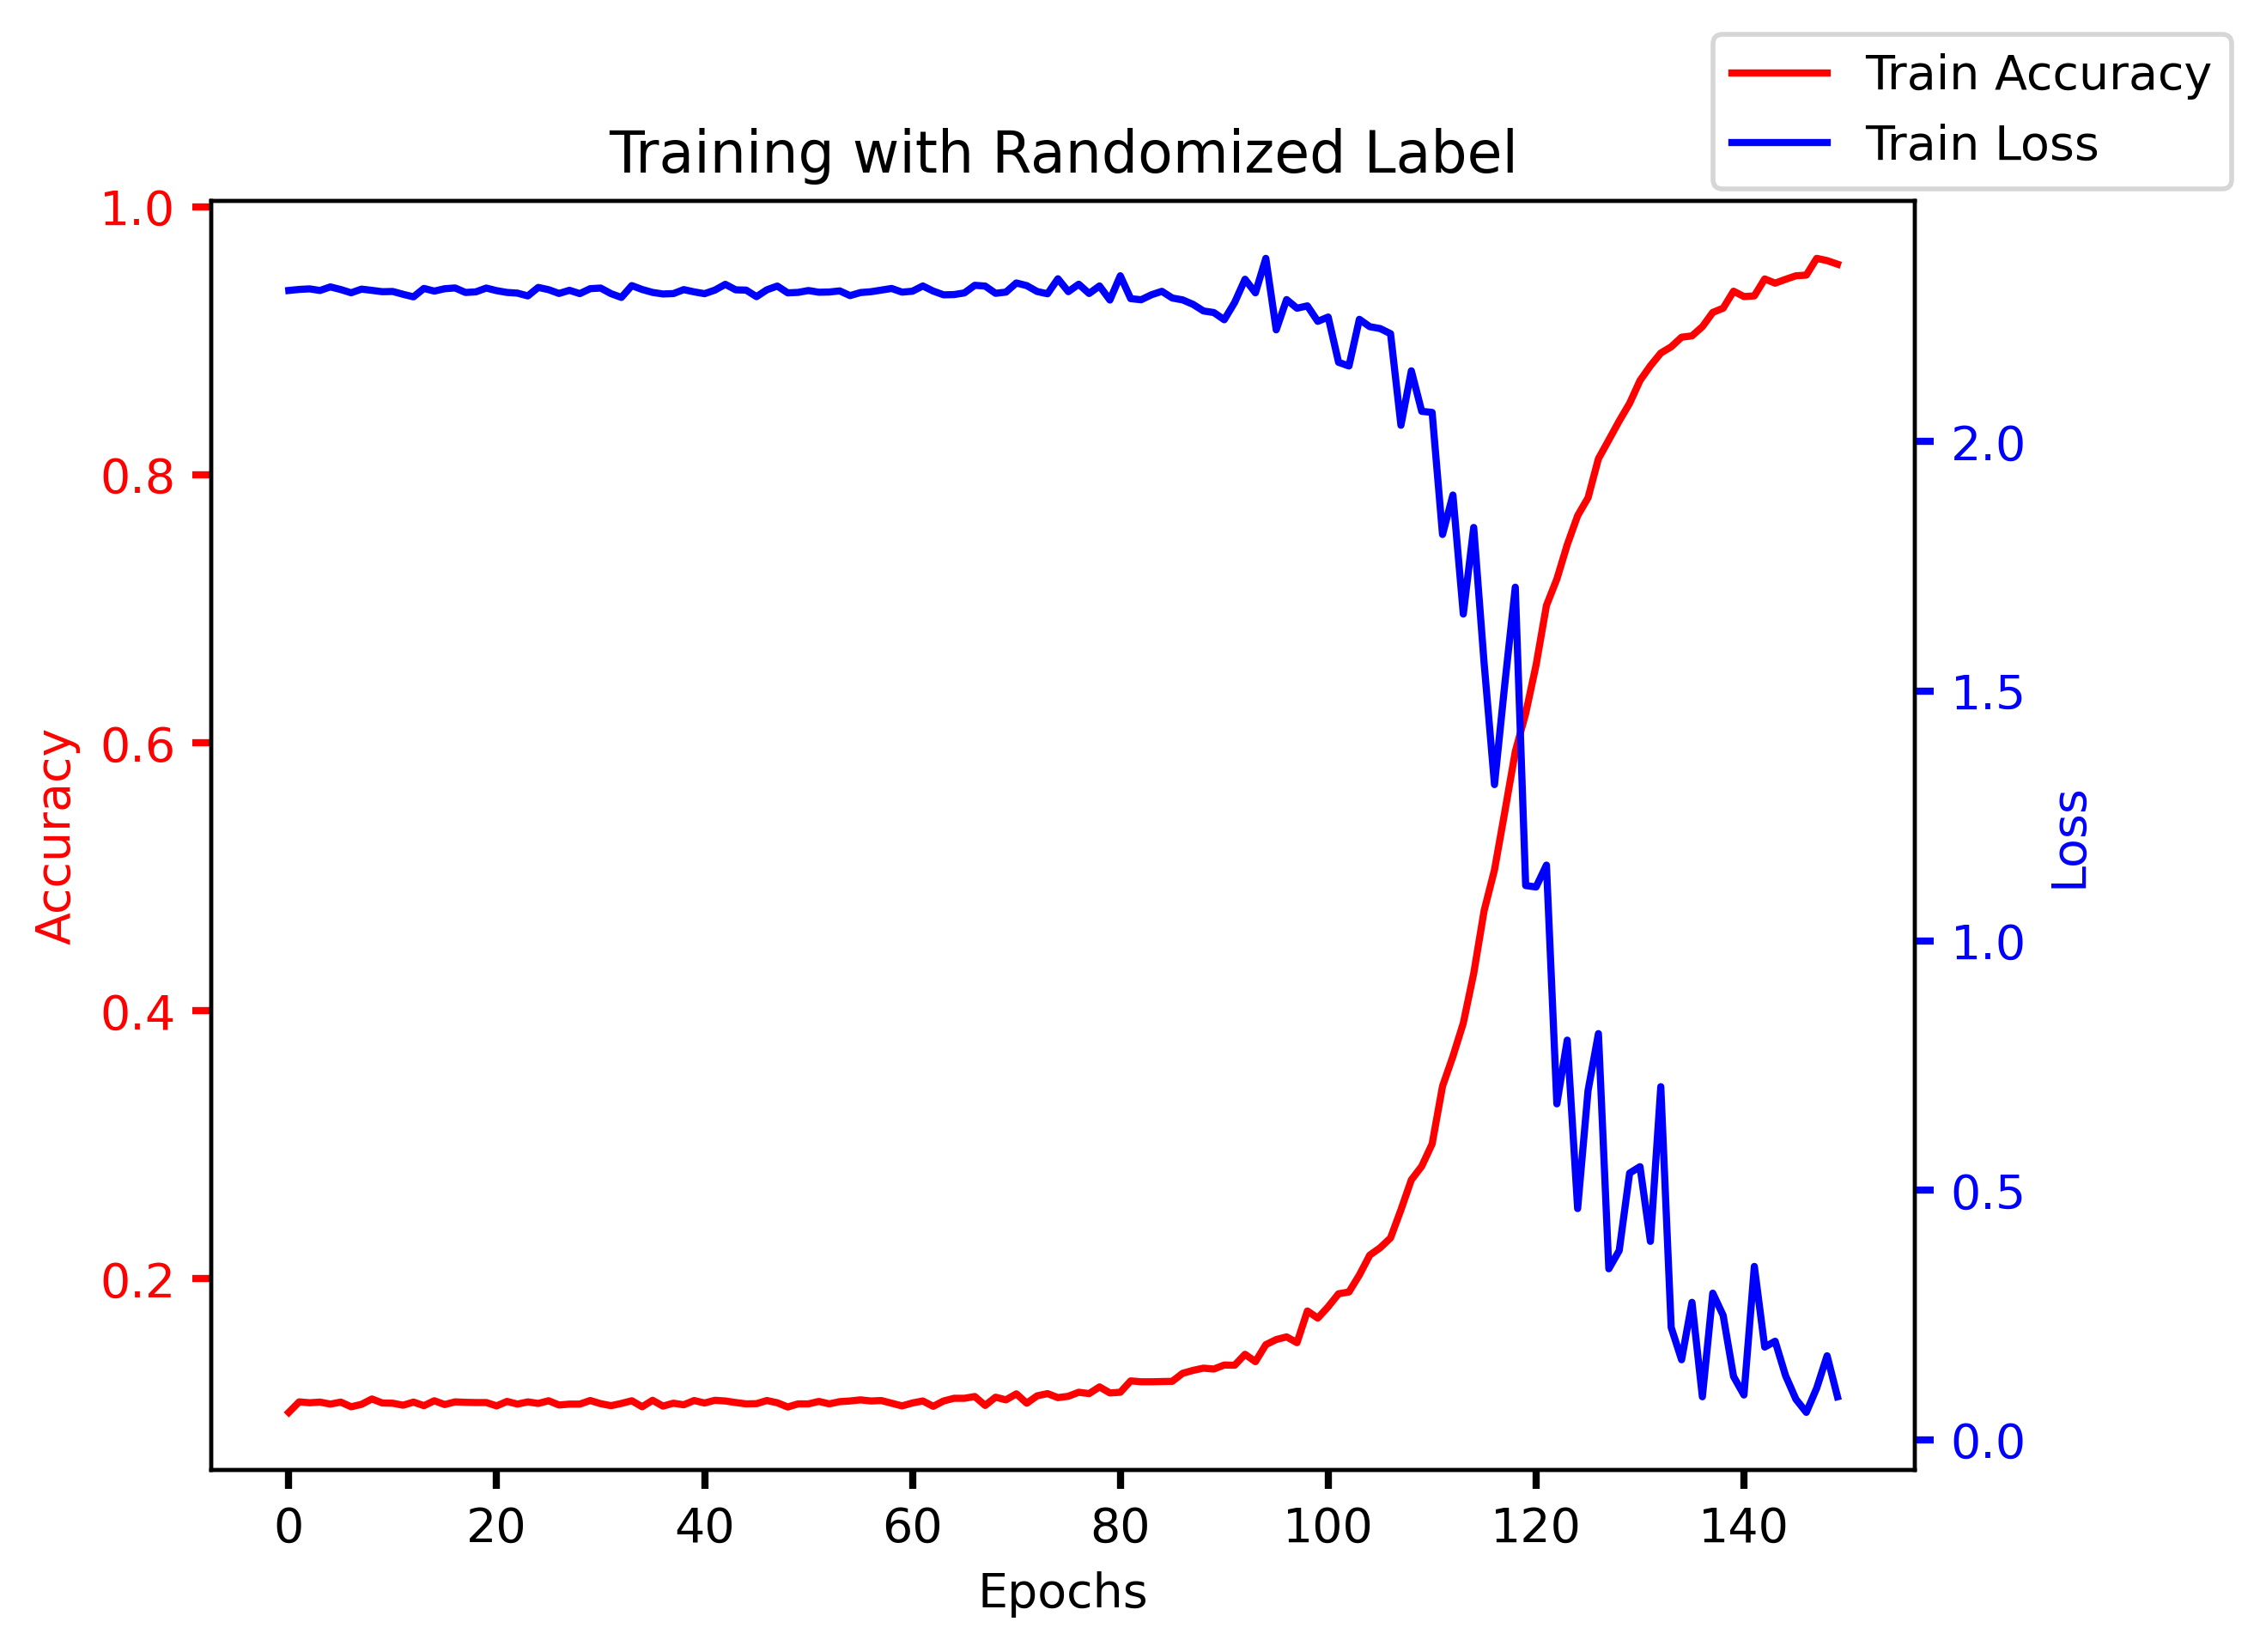

In [88]:
fig, ax = plt.subplots()
fig.dpi = 400
twin1 = ax.twinx()
plt.title("Training with Randomized Label")

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.

p1, = ax.plot(accuracy_list, "r-", label="Train Accuracy")
p2, = twin1.plot(loss_list, "b-", label="Train Loss")

ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
twin1.set_ylabel("Loss")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2], loc="upper right", bbox_to_anchor=(1.2, 1.15))

plt.show()